In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pandas as pd
import cv2
from sklearn.cluster import KMeans
import os
import pandas as pd

In [2]:
x=[]
y=[]
com = []

def drawImage(img):
  plt.imshow(img)
  plt.show()

def func(img):
  all_pixels = img.reshape((-1,1)) 
  km = KMeans(n_clusters=2)
  km.fit(all_pixels)
  centers = km.cluster_centers_
  com.append(centers)
  labels =km.labels_
  labels = labels.reshape((100,100))
  newImage = np.zeros((100,100))
  xint=0
  yint =0
  count=0
  for i in range(100):
    for j in range(100):
      if centers[0]<centers[1]:
        if(labels[i][j]==1):
          newImage[i][j]=1
          xint+=i
          yint+=j
          count+=1
        else:
          newImage[i][j]=0
      else:
        if(labels[i][j]==0):
          newImage[i][j]=1
          xint+=i
          yint+=j
          count+=1
        else:
          newImage[i][j]=0
  print(xint,yint)
  x.append(xint/count)
  y.append(yint/count)
  plt.scatter(xint/count,yint/count,c='blue')
  drawImage(newImage)

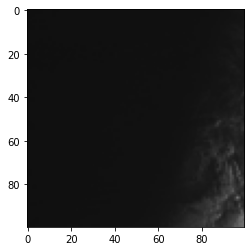

60532 67872


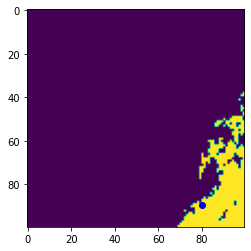

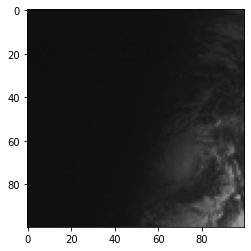

104025 119965


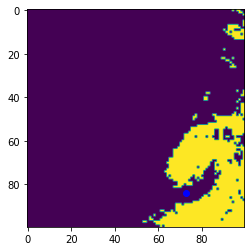

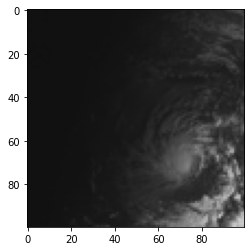

95395 107482


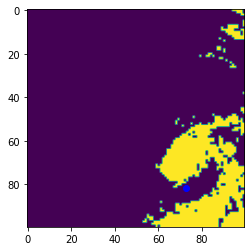

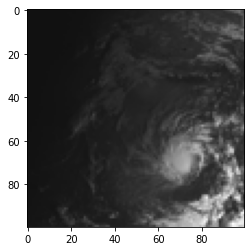

88679 99501


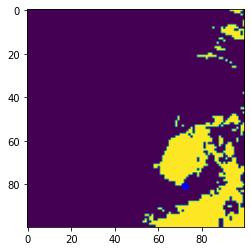

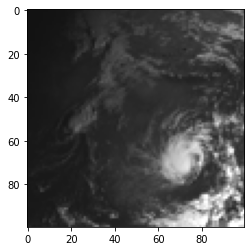

83530 93902


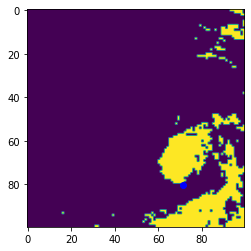

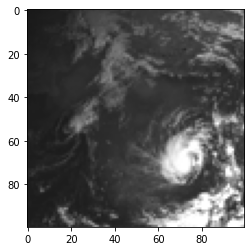

82829 91110


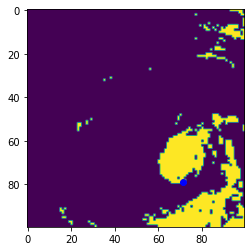

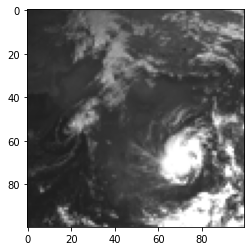

88483 99424


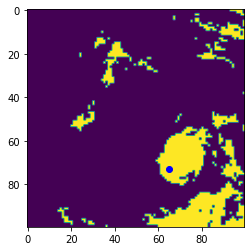

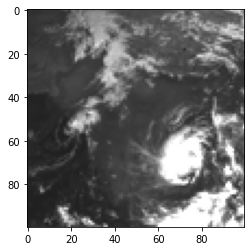

98748 115400


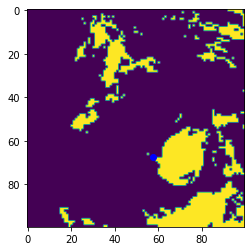

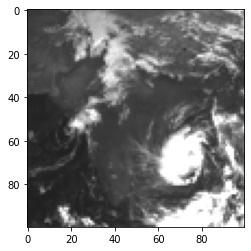

101192 121981


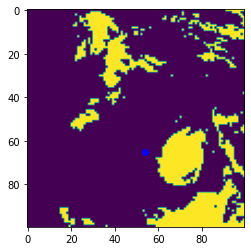

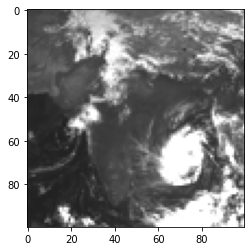

101578 123665


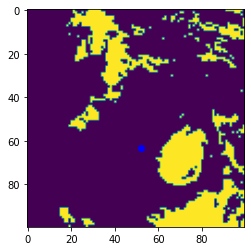

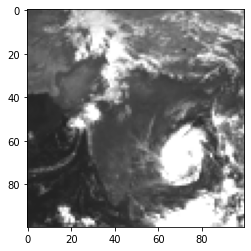

101909 124182


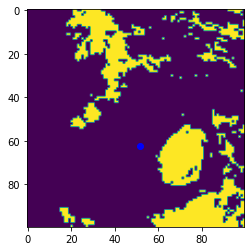

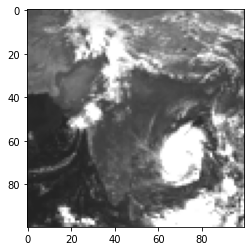

101359 122549


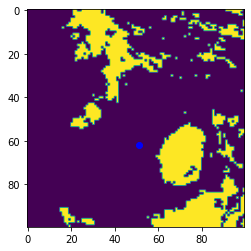

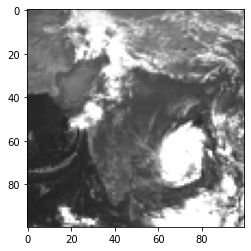

103391 123673


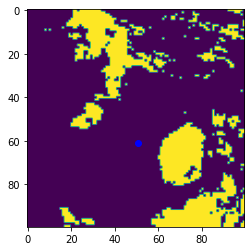

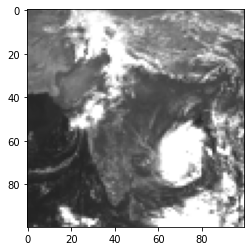

102799 120246


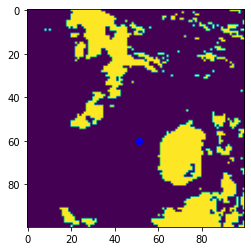

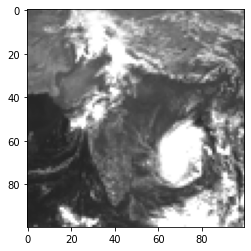

103724 119147


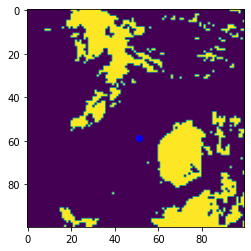

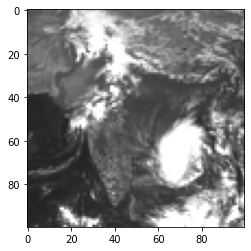

103101 116990


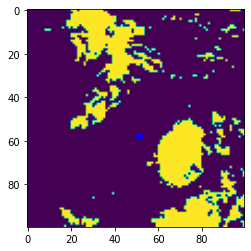

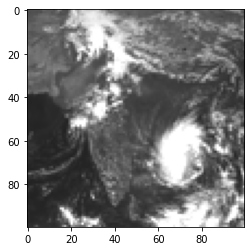

104889 117254


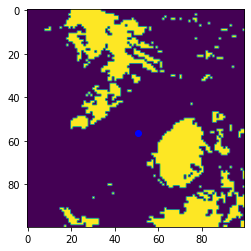

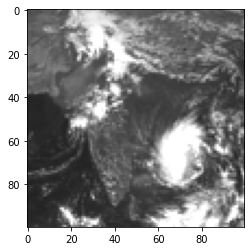

105447 118055


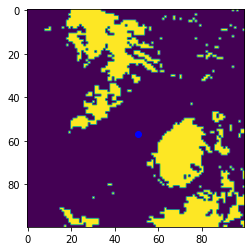

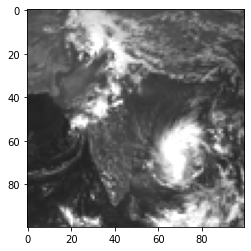

103827 113025


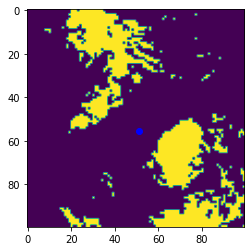

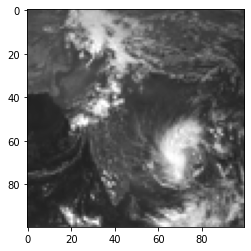

102505 110394


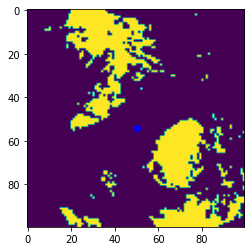

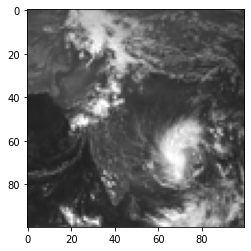

102743 110876


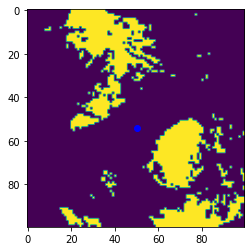

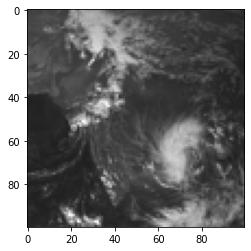

96396 100397


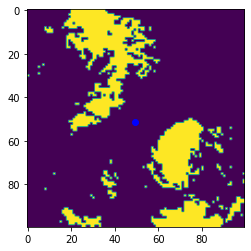

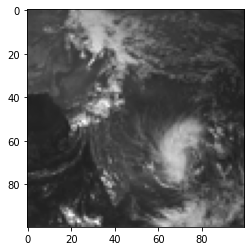

96334 100278


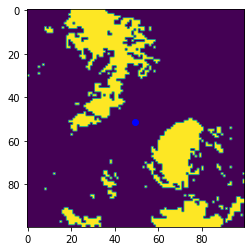

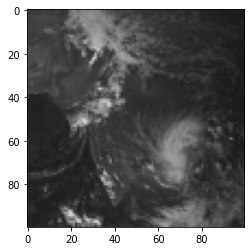

88822 87235


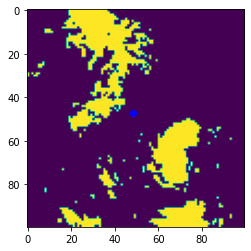

In [3]:
dirname = '/content/drive/My Drive/ISRO_SIH_20/INSAT3D_VIS_India'
timeaccord= []
for fname in os.listdir(dirname):
  timeaccord.append(fname)
timeaccord.sort()
final = []
for fname in timeaccord[:24]:
    img = Image.open(os.path.join(dirname, fname))
    img = img.resize((100,100))
    drawImage(img)
    imarray = np.array(img)
    func(imarray)
    final.append(imarray)

In [4]:
cmx =[]
for i in range(24):
  if com[i][0]>com[i][1]:
    cmx.append(com[i][0])
  else:
    cmx.append(com[i][1])

cmx = np.array(cmx)
cmx_predict = []
cmx_predict2 =[]
for i in range(4):
  cmx_predict.append(cmx[i])
for i in range(4):
  cmx_predict2.append(cmx[i])
for i in range(3,cmx.shape[0]):
  dx = cmx[i-1]-cmx[i-2] 
  xt = cmx[i-1]+dx
  xat = cmx[i]
  dx2 = xat - xt
  cmx_predict.append(xat+dx2)

for i in range(3,cmx.shape[0]):
  xt = (cmx[i-1]+cmx[i-2])/2
  xat = cmx[i]
  dx = xat-xt
  xt1 = ((xat+xt)/2)+dx
  cmx_predict2.append(xt1)

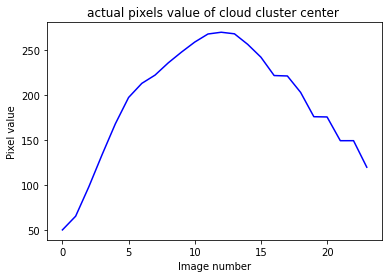

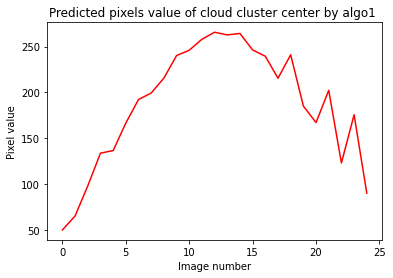

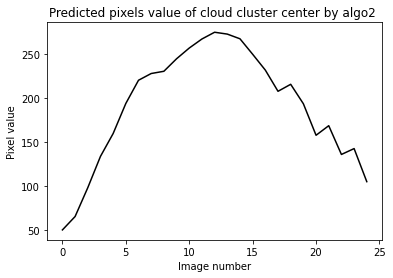

In [5]:
plt.plot(cmx,'blue')
plt.title("actual pixels value of cloud cluster center ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()
plt.plot(cmx_predict,'red')
plt.title("Predicted pixels value of cloud cluster center by algo1 ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()
plt.plot(cmx_predict2,'black')
plt.title("Predicted pixels value of cloud cluster center by algo2 ")
plt.xlabel("Image number")
plt.ylabel("Pixel value")
plt.show()

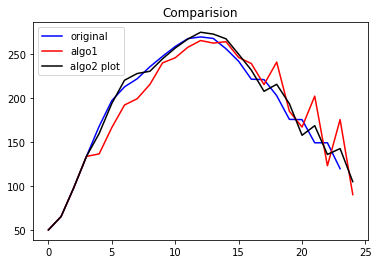

In [6]:
plt.plot(cmx,'blue')
plt.plot(cmx_predict,'red')
plt.plot(cmx_predict2,'black')
plt.legend(['original','algo1',"algo2 plot"])
plt.title("Comparision")
plt.show()

In [7]:
x=np.array(x)
y=np.array(y)
x_predict = []
y_predict = []

for i in range(4):
  x_predict.append(x[i])
  y_predict.append(y[i])

for i in range(3,x.shape[0]):
  dx = x[i-1]-x[i-2]
  xt = x[i-1]+dx
  xat = x[i]
  dx2 = xat - xt
  x_predict.append(xat+dx2)
  dy = y[i-1]-y[i-2]
  yt = y[i-1]+dy
  yat = y[i]
  dy2 = yat - yt
  y_predict.append(yat+dy2)

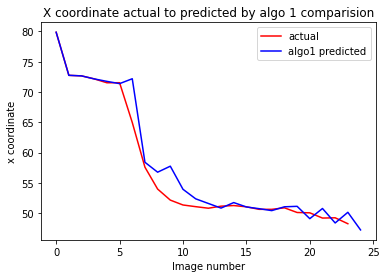

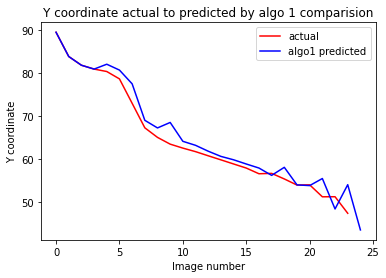

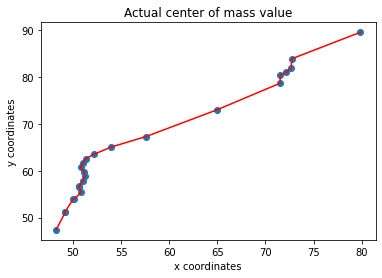

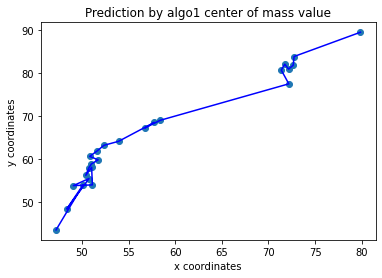

In [8]:
plt.plot(x, 'r')
plt.plot(x_predict, 'b')
plt.title("X coordinate actual to predicted by algo 1 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('x coordinate')
plt.show()
plt.plot(y,'r')
plt.plot(y_predict, 'b')
plt.title("Y coordinate actual to predicted by algo 1 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('Y coordinate')
plt.show()
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.title("Actual center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()
plt.scatter(x_predict,y_predict)
plt.plot(x_predict,y_predict,'b')
plt.title("Prediction by algo1 center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

47.22415303352806 43.51075738270383


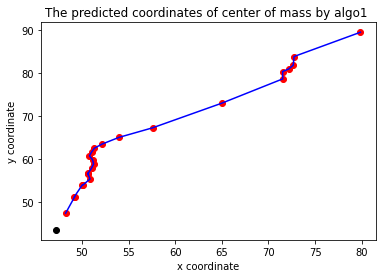

In [9]:
plt.scatter(x,y,c="red")
plt.plot(x,y,'blue')
plt.title("The predicted coordinates of center of mass by algo1 ")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.scatter(x_predict[-1],y_predict[-1],c="black")
print(x_predict[-1],y_predict[-1])
plt.show()

In [10]:
x_predict2 = []
y_predict2 = []

for i in range(4):
  x_predict2.append(x[i])
  y_predict2.append(y[i])

for i in range(3,x.shape[0]):
  xt = (x[i-1]+x[i-2])/2
  yt = (y[i-1]+y[i-2])/2
  xat = x[i]
  yat = y[i]
  dx = xat-xt
  dy = yat-yt
  xt1 = ((xat+xt)/2)+dx
  yt1 = ((yat+yt)/2)+dy
  x_predict2.append(xt1)
  y_predict2.append(yt1)

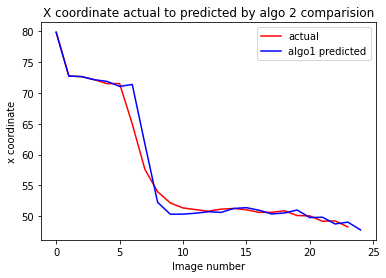

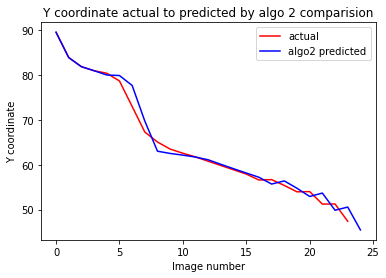

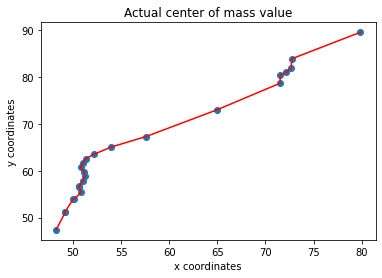

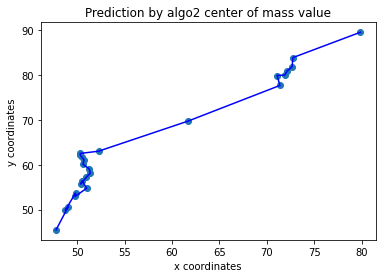

In [11]:
plt.plot(x, 'r')
plt.plot(x_predict2, 'b')
plt.title("X coordinate actual to predicted by algo 2 comparision")
plt.legend(['actual','algo1 predicted'])
plt.xlabel('Image number')
plt.ylabel('x coordinate')
plt.show()
plt.plot(y,'r')
plt.plot(y_predict2, 'b')
plt.title("Y coordinate actual to predicted by algo 2 comparision")
plt.legend(['actual','algo2 predicted'])
plt.xlabel('Image number')
plt.ylabel('Y coordinate')
plt.show()
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.title("Actual center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()
plt.scatter(x_predict2,y_predict2)
plt.plot(x_predict2,y_predict2,'b')
plt.title("Prediction by algo2 center of mass value")
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.show()

In [12]:
print("Prediction of movement of cluster center\n")
print("Cloud cluster center moves to:",x_predict2[-1],y_predict2[-1])

Prediction of movement of cluster center

Cloud cluster center moves to: 47.76816326669392 45.460951980589975


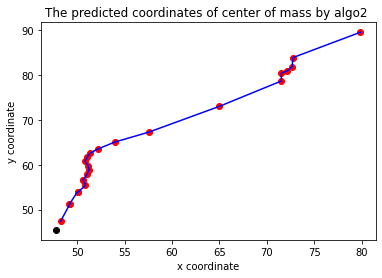

In [13]:
plt.scatter(x,y,c="red")
plt.plot(x,y,'blue')
plt.scatter(x_predict2[-1],y_predict2[-1],c="black")
plt.title("The predicted coordinates of center of mass by algo2 ")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

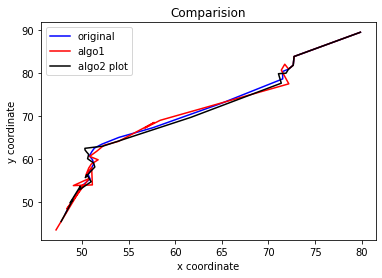

In [14]:
plt.plot(x,y,'blue')
plt.plot(x_predict,y_predict,'red')
plt.plot(x_predict2,y_predict2,'black')
plt.legend(['original','algo1',"algo2 plot"])
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.title("Comparision")
plt.show()


In [16]:
data = [[]]
for i in range(x.shape[0]):
  dummy = []
  dummy.append(i)
  dummy.append((x[i],y[i]))
  dummy.append((x_predict[i],y_predict[i]))
  dummy.append((x[i]-x_predict[i],y[i]-y_predict[i]))
  data.append(dummy)

data1 = [[]]
for i in range(x.shape[0]):
  dummy = []
  dummy.append(i)
  dummy.append((x[i],y[i]))
  dummy.append((x_predict2[i],y_predict2[i]))
  dummy.append((x[i]-x_predict2[i],y[i]-y_predict2[i]))
  data1.append(dummy)

df = pd.DataFrame(data, columns = ["Image Number","Actual COM","Predicted COM", "Difference"]) 
df1 = pd.DataFrame(data1, columns = ["Image Number","Actual COM","Predicted COM", "Difference"])



In [17]:
#by algo1
df

,Image Number,Actual COM,Predicted COM,Difference
0,NaN,None,None,None
1,0.0,"(79.85751978891821, 89.54089709762533)","(79.85751978891821, 89.54089709762533)","(0.0, 0.0)"
2,1.0,"(72.74475524475524, 83.89160839160839)","(72.74475524475524, 83.89160839160839)","(0.0, 0.0)"
3,2.0,"(72.65422696115765, 81.85986290936786)","(72.65422696115765, 81.85986290936786)","(0.0, 0.0)"
4,3.0,"(72.1554109031733, 80.96094385679415)","(72.1554109031733, 80.96094385679415)","(0.0, 0.0)"
5,4.0,"(71.51541095890411, 80.39554794520548)","(71.74712312878655, 82.09377028646095)","(-0.23171216988244225, -1.6982223412554731)"
6,5.0,"(71.52763385146805, 78.67875647668394)","(71.37422707261926, 80.72907108619053)","(0.15340677884879028, -2.050314609506586)"
7,6.0,"(64.96549192364171, 72.99853157121879)","(72.17985668830119, 77.52736091975108)","(-7.214364764659479, -4.528829348532284)"
8,7.0,"(57.57900874635568, 67.28862973760933)","(58.39112710325142, 69.03509813427517)","(-0.8121183568957377, -1.746468396665847)"
9,8.0,"(53.96906666666667, 65.05653333333333)","(56.754667496896005, 67.25895280946501)","(-2.7856008302293347, -2.2024194761316807)"


In [18]:
By algo-2
df1

,Image Number,Actual COM,Predicted COM,Difference
0,NaN,None,None,None
1,0.0,"(79.85751978891821, 89.54089709762533)","(79.85751978891821, 89.54089709762533)","(0.0, 0.0)"
2,1.0,"(72.74475524475524, 83.89160839160839)","(72.74475524475524, 83.89160839160839)","(0.0, 0.0)"
3,2.0,"(72.65422696115765, 81.85986290936786)","(72.65422696115765, 81.85986290936786)","(0.0, 0.0)"
4,3.0,"(72.1554109031733, 80.96094385679415)","(72.1554109031733, 80.96094385679415)","(0.0, 0.0)"
5,4.0,"(71.51541095890411, 80.39554794520548)","(71.88337080328174, 80.00354795994716)","(-0.36795984437762286, 0.39199998525832314)"
6,5.0,"(71.52763385146805, 78.67875647668394)","(71.07070697227343, 79.88812022626772)","(0.4569268791946257, -1.2093637495837726)"
7,6.0,"(64.96549192364171, 72.99853157121879)","(71.37374531168273, 77.67901176452601)","(-6.408253388041018, -4.680480193307218)"
8,7.0,"(57.57900874635568, 67.28862973760933)","(61.687476682869516, 69.72922125135584)","(-4.108467936513833, -2.4405915137465115)"
9,8.0,"(53.96906666666667, 65.05653333333333)","(52.24523167575608, 63.0136225944383)","(1.7238349909105892, 2.0429107388950314)"


In [19]:
s =0
s1=0
sy=0
sy1=0
for i in range(x.shape[0]):
  s+=(x[i]-x_predict[i])**2
  s1+=(x[i]-x_predict2[i])**2
  sy+=(y[i]-y_predict[i])**2
  sy1+=(y[i]-y_predict2[i])**2
print("Mean Square value for algo 1 for x and y coordinates are",s**0.5,sy**0.5)
print("Mean Square value for algo 1 for x and y coordinates are",s1**0.5,sy1**0.5)

Mean Square value for algo 1 for x and y coordinates are 10.49236594919505 12.216432277348085
Mean Square value for algo 1 for x and y coordinates are 8.29563034725514 7.566372977067337
